# BIG DATA A3 - Notebook du projet

<i>Strasbourg, Juillet 2019</i>

## Contexte

Alors que la canicule frappe dûrement la France, que Greta Thunberg ne cesse de faire la une des journaux suite à ses déclarations alarmantes, et qu'aucun pays ne prend de réelles actions au sujet du climat, notre jeune équipe d'ingénieurs informaticiens au CesiCDP décide de répondre à l'appel de l'Agence de l’Environnement et de la Maîtrise de l’Energie.

Notre entreprise a une expérience non négligeable dans le domaine de la mobilité. De petite entreprise de quelques membres en 2010, CesiCDP s'est grandement développée en quelques années après avoir mis en place en 2012 un système de livraisons communautaire permettant à n'importe qui, contre rémunération, de livrer colis ou courrier. Nous comptons aujourd'hui plus de 50 000 employés dans 195 pays différents, nos services sont déployés partout dans le monde et nous sommes des invités récurrents des sommets concernant la mobilité.

Les activités du transport routier se sont considérablement accrues avec le développement des réseaux commerciaux au cours des dernières décennies. Cette forte croissance a eu pour conséquence, entre autres, de rendre beaucoup plus complexe la gestion des flux de transport.  
Depuis le début de la seconde moitié du 20ème siècle, des spécialistes de la recherche opérationnelle se sont penchés sur la résolution des problèmes de transport routier. Dans leurs travaux, ils ont développé un grand nombre de méthodes de résolution que nous allons utiliser dans cette étude.

Cet appel de l'ADEME est une nouvelle occasion pour nous de montrer notre sens de l'innovation, ainsi que de prouver que nous portons un grand intérêt au problèmes majeurs de notre société. Nous accordons beaucoup d'importance à rendre la vie de nos clients meilleure, mais également celle des autres personnes que nous pouvons impacter de part nos services. C'est pourquoi nous avons décidé de prendre nos responsabilités et de répondre à cet appel.

Pour y répondre, notre équipe composée de 5 membres a réalisé une étude concernant la gestion des transports, que ce soit pour de la livraison, pour le ramassage des déchets, pour le traitement du réseau routier, etc.
A l'heure actuelle, les chauffeurs réalisent leurs itinéraires selon leur expérience, ou encore selon leurs préférences, ce qui parfois amène a des trajets plus longs qu'ils ne devraient l'être.  
L'optimisation de ces trajets sera donc le sujet de cette étude.

Cette étude d'optimisation, en plus de pouvoir être utilisé par les livreurs, pourra également être utilisé pour définir le trajet des drones de livraisons, pratique de plus en plus populaire, la preuve en est avec Amazon, lesquels ont déclaré récemment que  des drones de livraisons allaient être déployés prochainement dans certaines villes.  
Il sera donc possible de tendre vers un système de livraison complètement automatique et parfaitement optimisé pour réduire coûts et pollution.

Ce document synthéthisera les résulats de cette études, avec une présentation du problème, des différentes métaheuristiques de résolution, ainsi que leurs résultats. 

## Le problème

### Introduction

Les problèmes de transport routier se trouvent au coeur des problématiques de la logistique.  
Avant de parvenir au consommateur final, un produit parcourt, en général, des centaines
voire des milliers de kilomètres par voie terrestre. Les contextes et les moyens de transport
n'étant pas toujours identiques, les problèmes de transport présentent des caractéristiques
diverses.

### Modélisation
  
Au problème de base évoqué dans le sujet de ce projet, nous avons rajouté la contrainte des Fenêtres de temps de livraison.
La contrainte avancée retenue est ainsi la possibilité d'attendre sur place l'ouverture d'une fenêtre de livraison.
La modélisation de notre la problème est donc la suivante :  

Notre problème consiste donc en l'organisation d'une tournée de livraison ou l'on livre à chaque à ville un objet en passant uniquement une fois par une ville. La tournée de livraison est finie lorsque l'on retourne à la première ville. Les villes sont toutes interconnectées.

Dans ce problème on cherche à minimiser la longueur du trajet de la tournée de livraison.

Avec l'ajout de la contrainte mentionée ci-dessus, on cherche également à minimiser les écarts entre l'heure réelle de livraison et l'intervalle de livraison souhaité pour chaque objet.

Sachant qu'il est possible d'attendre l'ouverture d'une fenêtre temporelle de livraison sur place si le camion arrive en avance, la durée du trajet n'est alors plus linéaire par rapport à la distance parcourrue.
On cherche donc aussi à minimiser la durée d'une tournée de livraison.



### Paramètres

<b> Les véhicules </b>

Les véhicules constituent les principales ressources indispensables à l'organisation du transport. Ils sont disponibles en quantité limitée et sont en charge de la livraison.  
Pour la réalisation de cette étude, notre quantité de véhicule est de 1.

<b> Les villes </b>

Dans le cadre de notre étude, une ville est ce qui va passer une commande. Chaque ville a une localisation bien précise et immuable, ainsi qu'une fenêtre de livraison.

### Contrainte

Dans notre étude, la seule contrainte est la fenêtre de livraison. Elle a souvent un impact significatif sur
l'ordonnancement des tournées dans la mesure où elle impose une date de début et/ou de fin pour les visites chez les clients.

### Fonction objectif

La fonction-objectif consiste en une fonction de coût à minimiser ou une fonction de profit à
maximiser. En ce qui a trait au problème que cette étude traite, on recherche les objectifs suivant :

- Minimisation des distances parcourues : la somme des distances parcourues au cours des tournées est minimisée ;
- Minimisation du temps écoulé : le temps écoulé au cours des tournées est minimisé ;


### Étude de complexité

#### Classe de complexité

C'est un problème appartenant à la classe des problèmes NP-Complet. Il n’existe pas d’algorithme permettant de trouver une solution exacte en temps polynomial pour ce problème. 
Ce problème est une variante du problème du voyageur de commerce, qui est également NP-Complet, avec une contrainte supplémentaire (celle des fenêtres de livraison).

Pour démontrer que notre problème est NP-Complet, il suffit de démontrer que celui du voyageur du commerce est NP-Complet.

Pour prouver que le problème du voyageur de commerce est bien NP-Complet on utilise un raisonnement par l’absurde en conjecturant que dans le cas général il n’existe pas d’algorithme d’approximation permettant de le résoudre et que P ≠ NP.

Le but est de répondre à « existe-t-il chemin un chemin plus court que D passant par toutes les villes et qui termine sur la ville de départ ». Cela revient à trouver un cycle hamiltonien.  
Nous allons alors chercher à démontrer qu’il existe un algorithme d’approximation (1 + Y) (Y est lu Upsilon, il représente une très petite valeur) avec Y > 0 qui permet de résoudre le problème de recherche d’un cycle hamiltonien en temps polynomial.

On considère un graphe G non complet d’arrêtes de poids 1. Le graphe complet de G noté G’ est le graphe ou l’on rajoute à deux sommets non reliés une arrête de poids |S|(1+Y)+1 avec |S| le nombre de sommet de G.
Si G possède un chemin hamiltonien, alors G’ possède un cycle de poids |S|, sinon le cycle minimal contient au moins une arrête de poids |S|(1+Y)+1 et le poids de du cycle sera alors de |S|(2+Y).  
Dans ce cadre la l’algorithme d’approximation est capable de trouver un cycle de poids |S|(1+Y) ou |S|(2+Y). 

Nous avons donc trouvé une solution en temps polynomial alors que le problème fait partie de NP. Cela démontre notre conjecture que le problème du voyageur de commerce est bien dans NP.

#### Complexité du problème

La complexité du problème du voyageur de commerce est O(n !), c’est une factoriel. Cela signifie que pour un ensemble de ville n il y a n! chemin possible. Une factoriel est défini par la fonction :

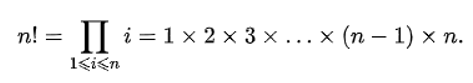

Dans notre cas le point de départ ne change pas et vu que les chemins allés et retour sont les mêmes et font donc la même distance on à (n-1)! Chemin à parcourir dans les deux sens ce qui décrits qu’il y a en tout ((2n-1!))/2 chemins possibles.
 
Le tableau présente le nb de possibilités ainsi que le temps de calcul (en microseconde) nécessaire à sa réalisation en fonction du nombre de ville avec 1 possibilités = 1 microseconde.

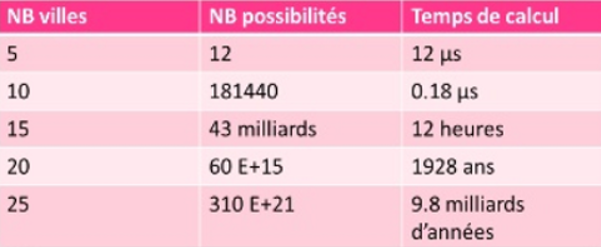

On peut voir que l’augmentation du nombre de villes augmente grandement le nombre de possibilités, le temps de calcul dépasse rapidement ce qu’il est possible de réaliser avec les instruments que nous avons à disposition actuellement.


# Solutions

Ci-dessous sont listées chaque solution traitée par cette étude pour permettre de résoudre le problème d'optimisation des trajets.


## L'algorithme de la recherche tabou
### Présentation

La recherche tabou consiste en ce qui suit :

En partant d'une position donnée, choisir la position voisine qui minimise la fonction objectif.  
Le mécanisme de la recherche tabou va être de stocker les positions déjà explorées dans une liste tabou de type First In First Out d'une taille donnée, et d'interdire de retourner sur les positions contenues dans la liste.

Dans notre contexte, il se réalise de la façon suivante :

Partir d'une ville donnée, regarder les villes les plus proches et choisir celle qui est la plus près et dont la fenêtre de livraison est ouverte.
Les villes déjà explorées entrent dans la "liste tabou" de taille variable, et tant qu'elles seront dans cette liste le livreur n'aura pas le droit d'y retourner.

### Résultats

Pour notre problème, cet algorithme a eu les résultats suivants :

## L'algorithme du recuit simulé

### Présentation

Le recuit simulé consiste en ce qui suit :  

On définit une température initiale (T0), une température à atteindre (Tmin) ainsi qu'une vitesse de refroidissement (tau).

On appelle Energie E la fonction à minimiser. Suite à une modification de l'état du système, un autre état est obtenu. Si il améliorer le critère que l'on veut optimiser, il fait baisser l'énergie du système.  
Si cet été dégrade le critère que l'on veut optimiser, il est possible de l'accepter selon une probabilité p, ce qui permet d'éviter un optimum local.

L'algorithme s'arrête une fois la température minimum atteinte.  

Dans notre contexte, il se réalise de la façon suivante :

Réaliser un trajet aléatoire, puis calculer la distance totale que représente ce trajet.  
Ensuite, échanger aléatoirement deux arêtes de ce trajet. On applique ensuite la loi de Métropolis :  
Si la distance totale a baissé, on garde ce changement. Sinon, elle peut être gardé selon une proba p définie par :  
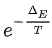 Avec E l'énergie (la distance totale) et T la température du système.

On applique ensuite la loi de refroidissement, qui est une loi de décroissance exponentielle : !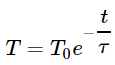

Lorsque que la température a atteint le minimum donné, on considère que l'algorithme a terminé et que la solution est optimisée.

### Résultats

Pour notre problème, cet algorithme a eu les résultats suivants :

Pour 10 villes :

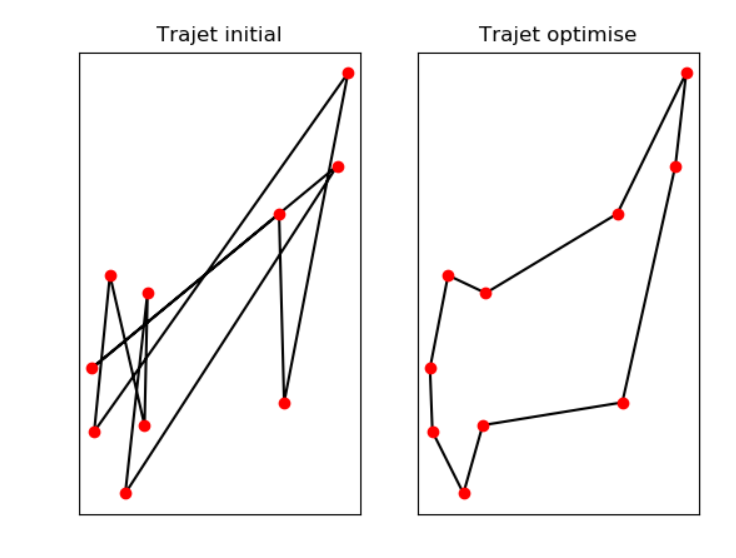

Pour 50 villes :

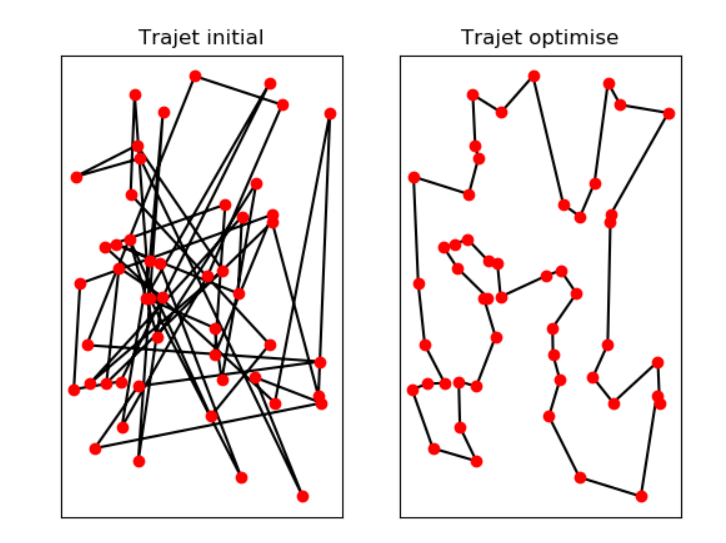

## L'algorithme de la colonie de fourmis

### Présentation

La colonie de fourmis est une métaheuristique de population se basant sur un superorganisme, les fourmis. Il consiste en ce qui suit :

Une fourmi parcourt plus ou moins au hasard l’environnement autour de la colonie ;  
si celle-ci découvre une source de nourriture, elle rentre plus ou moins directement au nid, en laissant sur son chemin une piste de phéromones ;  
ces phéromones étant attractives, les fourmis passant à proximité vont avoir tendance à suivre, de façon plus ou moins directe, cette piste ;  
en revenant au nid, ces mêmes fourmis vont renforcer la piste ;  
si deux pistes sont possibles pour atteindre la même source de nourriture, celle étant la plus courte sera, dans le même temps, parcourue par plus de fourmis que la longue piste ;  
la piste courte sera donc de plus en plus renforcée, et donc de plus en plus attractive ;  
la longue piste, elle, finira par disparaître, les phéromones étant volatiles ;  
à terme, l’ensemble des fourmis a donc déterminé et « choisi » la piste la plus courte.

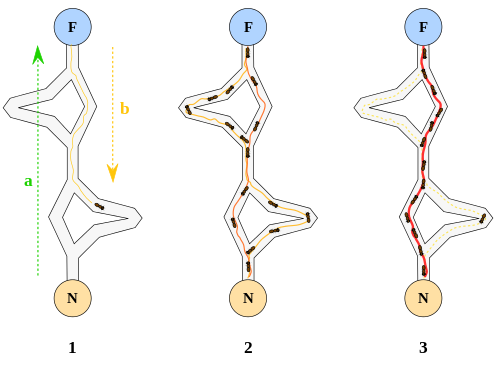

Dans notre contexte, il se réalise de la façon suivante :

A chaque itération, des "fourmis" sont envoyés pour parcourir des trajets possibles de notre problème.  
Plus la distance sera faible, plus les fourmis vont déposer de phéromones dessus pour attester la qualité de la solution.  
Ces phéromones vont influencer la prochaine itération, en effet plus un chemin est rempli de phéromones plus une fourmi sera tenté de le choisir. Mais ce n'est pas le seul facteur, la visibilité d'une ville, c'est à dire la distance qui la sépare de la fourmie, est aussi un facteur qui va influencer la fourmi à choisir un chemin.  
Lors de chaque itération, une partie des phéromones s'évapore, pour éviter de rester dans un optimum local

Les paramètres modifiables sont : l'importance de la visibilité, l'importance des phéromones, le taux de disparition des phéromones, la quantité de phéromones déposée et la quantité de fourmis

Voici la formule qui permet de définir la probabilité qu'une arête soit séléctionnée par une fourmi :

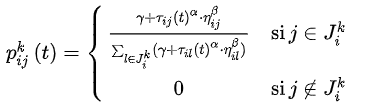

où Jik est la liste des déplacements possibles pour une fourmi k lorsqu’elle se trouve sur une ville i, ηij la visibilité, qui est égale à l’inverse de la distance de deux villes i et j (1/dij) et τij (t) l’intensité de la piste à une itération donnée t. Les deux principaux paramètres contrôlant l’algorithme sont α et β, qui contrôlent l’importance relative de l’intensité et de la visibilité d’une arête, et gamma une variable non nul pour éviter que des arêtes ne soient jamais prises.

Ici la formule qui indique la quantité de phéromones déposé sur une arête :

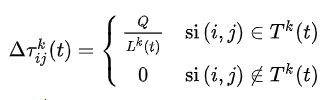

où Tk (t) est la tournée faite par la fourmi k à l’itération t, Lk (t) la longueur du trajet et Q un paramètre de réglage.

Et à la fin de l'itération, on a la somme des phéromones qui ne se sont pas évaporées et de celles qui viennent d'être déposées :

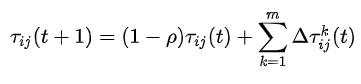

où m est le nombre de fourmis utilisées pour l’itération t et ρ un paramètre de réglage.

### Résultat

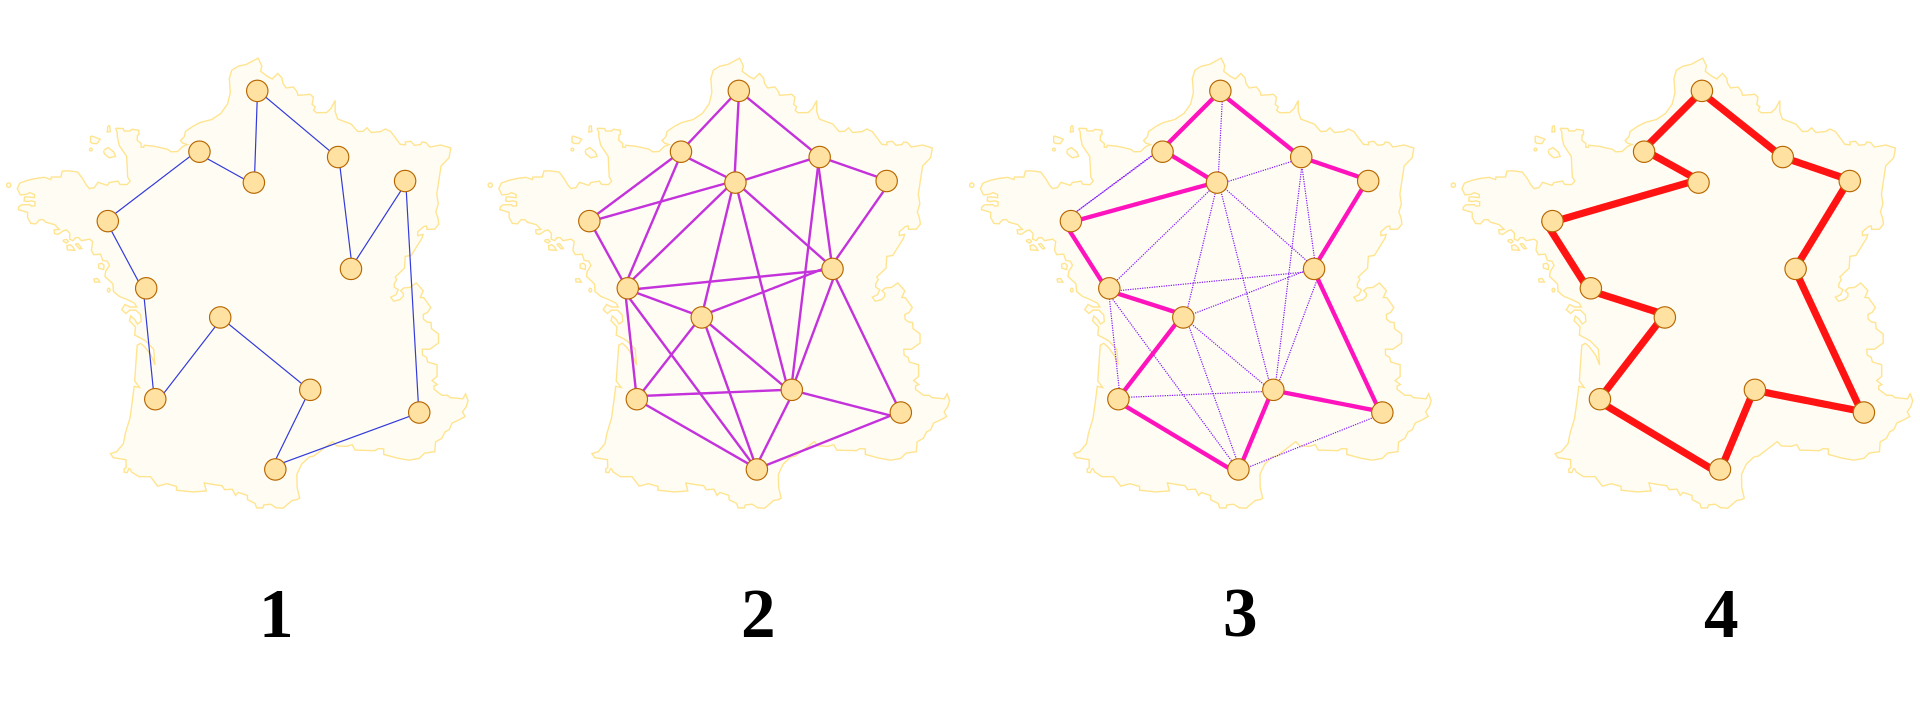

# Étude statistique

Ci-dessous sont listées des statistiques qui ont été générées à partir des solutions vues ci-dessus.

## Algorithme de la recherche tabou